In [1]:
import numpy as np
from pandas import Series,DataFrame
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from sqlalchemy import create_engine
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from datetime import datetime

In [2]:
Sales_Data= pd.read_csv('sales-data.csv')

# Let's get a glimpse at the data
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


In [3]:
print('Sales_Data.shape')

Sales_Data.shape


In [136]:
Sales_Data.shape

(7422, 21)

In [4]:
Sales_Data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14/11/18 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14/11/18 9:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14/11/18 9:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14/11/18 8:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14/11/18 7:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [5]:
Sales_Data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [6]:
Sales_Data.isnull().sum()

Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

In [7]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


In [8]:
Sales_Data.describe()

,Product_ID
count,7364.000000
mean,15.947311
std,6.072937
min,0.000000
25%,12.000000
50%,18.000000
75%,19.000000
max,28.000000


# Created
# Split Created variable as Day, Month, Year, Hour, Minute, and Second variables

In [9]:
Sales_Data['Created'] = pd.to_datetime(Sales_Data.Created)

In [10]:
Sales_Data['Created'].value_counts()

2018-09-26 11:30:00    4
2018-09-27 11:00:00    4
2018-10-05 12:30:00    4
2018-10-15 10:36:00    4
2018-09-14 12:00:00    4
                      ..
2018-08-29 12:52:00    1
2018-08-29 13:08:00    1
2018-08-29 15:26:00    1
2018-08-29 15:39:00    1
2018-04-28 07:54:00    1
Name: Created, Length: 6752, dtype: int64

In [11]:
Sales_Data['Date'] = Sales_Data.Created.dt.date
Sales_Data['Time'] = Sales_Data.Created.dt.time
Sales_Data['Day'] = Sales_Data.Created.dt.day
Sales_Data['Month'] = Sales_Data.Created.dt.month
Sales_Data['Year'] = Sales_Data.Created.dt.year
Sales_Data['Hour'] = Sales_Data.Created.dt.hour
Sales_Data['Minute'] = Sales_Data.Created.dt.minute
Sales_Data['Second'] = Sales_Data.Created.dt.second

In [12]:
Sales_Data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Date,Time,Day,Month,Year,Hour,Minute,Second
0,2018-11-14 10:05:00,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open,2018-11-14,10:05:00,14,11,2018,10,5,0
1,2018-11-14 09:22:00,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,09:22:00,14,11,2018,9,22,0
2,2018-11-14 09:21:00,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,09:21:00,14,11,2018,9,21,0
3,2018-11-14 08:46:00,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,08:46:00,14,11,2018,8,46,0
4,2018-11-14 07:34:00,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,07:34:00,14,11,2018,7,34,0


In [13]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Created        7422 non-null   datetime64[ns]
 1   Product_ID     7364 non-null   float64       
 2   Source         7405 non-null   object        
 3   Mobile         5612 non-null   object        
 4   EMAIL          7422 non-null   object        
 5   Sales_Agent    7399 non-null   object        
 6   Location       7364 non-null   object        
 7   Delivery_Mode  7422 non-null   object        
 8   Status         7422 non-null   object        
 9   Date           7422 non-null   object        
 10  Time           7422 non-null   object        
 11  Day            7422 non-null   int64         
 12  Month          7422 non-null   int64         
 13  Year           7422 non-null   int64         
 14  Hour           7422 non-null   int64         
 15  Minute         7422 n

# Product_ID

In [14]:
Sales_Data.Product_ID.value_counts()

18.0    1711
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: Product_ID, dtype: int64

In [15]:
Sales_Data.Product_ID[Sales_Data.Product_ID == '' ].count()

0

### Find the empty value and replace it with NaN

In [16]:
Sales_Data.Product_ID[Sales_Data.Product_ID == ''] = 'NaN'

C:\Users\Sanchitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
Sales_Data.Product_ID[Sales_Data.Product_ID == '' ].count()

0

In [18]:
Sales_Data.Product_ID[Sales_Data.Product_ID == 'NaN' ].count()

0

In [19]:
Sales_Data.Product_ID.value_counts()

18.0    1711
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: Product_ID, dtype: int64

In [20]:
Sales_Data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Date,Time,Day,Month,Year,Hour,Minute,Second
0,2018-11-14 10:05:00,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open,2018-11-14,10:05:00,14,11,2018,10,5,0
1,2018-11-14 09:22:00,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,09:22:00,14,11,2018,9,22,0
2,2018-11-14 09:21:00,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,09:21:00,14,11,2018,9,21,0
3,2018-11-14 08:46:00,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,08:46:00,14,11,2018,8,46,0
4,2018-11-14 07:34:00,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,07:34:00,14,11,2018,7,34,0


### Drop all Product_ID NaN values because it is too low

In [21]:
Sales_Data.shape

(7422, 17)

In [22]:
Sales_Data.Product_ID[Sales_Data.Product_ID == 'NaN' ].count()

0

In [23]:
Sales_Data.drop(Sales_Data[Sales_Data.Product_ID == 'NaN'].index,inplace = True)

In [24]:
Sales_Data.shape

(7422, 17)

In [25]:
Sales_Data.Product_ID[Sales_Data.Product_ID == 'NaN' ].count()

0

In [26]:
Sales_Data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Date,Time,Day,Month,Year,Hour,Minute,Second
0,2018-11-14 10:05:00,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open,2018-11-14,10:05:00,14,11,2018,10,5,0
1,2018-11-14 09:22:00,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,09:22:00,14,11,2018,9,22,0
2,2018-11-14 09:21:00,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,09:21:00,14,11,2018,9,21,0
3,2018-11-14 08:46:00,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,08:46:00,14,11,2018,8,46,0
4,2018-11-14 07:34:00,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,07:34:00,14,11,2018,7,34,0


In [27]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7422 entries, 0 to 7421
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Created        7422 non-null   datetime64[ns]
 1   Product_ID     7364 non-null   float64       
 2   Source         7405 non-null   object        
 3   Mobile         5612 non-null   object        
 4   EMAIL          7422 non-null   object        
 5   Sales_Agent    7399 non-null   object        
 6   Location       7364 non-null   object        
 7   Delivery_Mode  7422 non-null   object        
 8   Status         7422 non-null   object        
 9   Date           7422 non-null   object        
 10  Time           7422 non-null   object        
 11  Day            7422 non-null   int64         
 12  Month          7422 non-null   int64         
 13  Year           7422 non-null   int64         
 14  Hour           7422 non-null   int64         
 15  Minute         7422 n

### Product_ID - Type Casting object to int 

In [28]:
Sales_Data['Product_ID'] = pd.to_numeric(Sales_Data['Product_ID'])

In [29]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7422 entries, 0 to 7421
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Created        7422 non-null   datetime64[ns]
 1   Product_ID     7364 non-null   float64       
 2   Source         7405 non-null   object        
 3   Mobile         5612 non-null   object        
 4   EMAIL          7422 non-null   object        
 5   Sales_Agent    7399 non-null   object        
 6   Location       7364 non-null   object        
 7   Delivery_Mode  7422 non-null   object        
 8   Status         7422 non-null   object        
 9   Date           7422 non-null   object        
 10  Time           7422 non-null   object        
 11  Day            7422 non-null   int64         
 12  Month          7422 non-null   int64         
 13  Year           7422 non-null   int64         
 14  Hour           7422 non-null   int64         
 15  Minute         7422 n

# Source

In [30]:
Sales_Data.Source.value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source, dtype: int64

In [31]:
Sales_Data.Source[Sales_Data.Source == '' ].count()

0

### Find the empty value and replace it with NaN

In [32]:
Sales_Data.Source[Sales_Data.Source == ''] = 'NaN'

C:\Users\Sanchitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
Sales_Data.Source[Sales_Data.Source == '' ].count()

0

In [34]:
Sales_Data.Source[Sales_Data.Source == 'NaN' ].count()

0

In [35]:
Sales_Data.Source.value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source, dtype: int64

### Find the similar meaning value and replace with one common value

In [36]:
Sales_Data['Source'].replace(['Just Dial', 'Live Chat-Justdial'], 'Live Chat-Justdial', inplace=True)
Sales_Data['Source'].value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Live Chat-Justdial                 57
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Name: Source, dtype: int64

In [37]:
Sales_Data.Source.replace(to_replace=['Existing Client', 'Existing Customer'],value='Existing Client', inplace=True)
Sales_Data['Source'].value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Existing Client                    73
Live Chat-Justdial                 57
Live Chat-CPC                      50
Personal Contact                   50
By Recommendation                  32
CRM form                           23
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Name: Source, dtype: int64

### Drop all Source NaN values because it is too low

In [38]:
Sales_Data.shape

(7422, 17)

In [39]:
Sales_Data.Source[Sales_Data.Source == 'NaN' ].count()

0

In [40]:
Sales_Data.drop(Sales_Data[Sales_Data.Source == 'NaN'].index,inplace = True)

In [41]:
Sales_Data.shape

(7422, 17)

In [42]:
Sales_Data.Source[Sales_Data.Source == 'NaN' ].count()

0

In [43]:
Sales_Data.Source.value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Existing Client                    73
Live Chat-Justdial                 57
Live Chat-CPC                      50
Personal Contact                   50
By Recommendation                  32
CRM form                           23
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Name: Source, dtype: int64

# Mobile 
### Not required for Modeling

In [44]:
Sales_Data.Mobile.head()

0    984XXXXXXX
1       XXXXXXX
2       XXXXXXX
3       XXXXXXX
4       XXXXXXX
Name: Mobile, dtype: object

# Email
### Not required for modeling

In [45]:
Sales_Data.EMAIL.head()

0    aXXXXXXX@gmail.com
1               #VALUE!
2    dXXXXXXX@yahoo.com
3    wXXXXXXX@gmail.com
4    cXXXXXXX@gmail.com
Name: EMAIL, dtype: object

# Sales_Agent

In [46]:
Sales_Data.Sales_Agent.value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

### Find the empty value and replace it with NaN

In [47]:
Sales_Data.Sales_Agent[Sales_Data.Sales_Agent == ''].count()

0

In [48]:
Sales_Data.Sales_Agent[Sales_Data.Sales_Agent == ''] = 'NaN'

C:\Users\Sanchitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
Sales_Data.Sales_Agent[Sales_Data.Sales_Agent == ''].count()

0

In [50]:
Sales_Data.Sales_Agent[Sales_Data.Sales_Agent == 'NaN'].count()

0

In [51]:
Sales_Data.Sales_Agent.value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

### Drop all Sales_Agent NaN values because it is too low

In [52]:
Sales_Data.shape

(7422, 17)

In [53]:
Sales_Data.Sales_Agent[Sales_Data.Sales_Agent == 'NaN'].count()

0

In [54]:
Sales_Data.drop(Sales_Data[Sales_Data.Sales_Agent == 'NaN'].index,inplace = True)

In [55]:
Sales_Data.shape

(7422, 17)

In [56]:
Sales_Data.Sales_Agent[Sales_Data.Sales_Agent == 'NaN'].count()

0

In [57]:
Sales_Data.Sales_Agent.value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

### Split the Sales_Agent variable as SalesAgentLabel and SalesAgent variables

In [58]:
Sales_Data['Sales_Agent'].str.rsplit('-',1,expand = True).head()

,0,1
0,Sales-Agent,11
1,Sales-Agent,10
2,Sales-Agent,10
3,Sales-Agent,10
4,Sales-Agent,10


In [59]:
Sales_Data[['SalesAgentLabel','SalesAgent']] = Sales_Data['Sales_Agent'].str.rsplit('-',1,expand = True)
Sales_Data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Date,Time,Day,Month,Year,Hour,Minute,Second,SalesAgentLabel,SalesAgent
0,2018-11-14 10:05:00,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open,2018-11-14,10:05:00,14,11,2018,10,5,0,Sales-Agent,11
1,2018-11-14 09:22:00,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,09:22:00,14,11,2018,9,22,0,Sales-Agent,10
2,2018-11-14 09:21:00,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,09:21:00,14,11,2018,9,21,0,Sales-Agent,10
3,2018-11-14 08:46:00,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,08:46:00,14,11,2018,8,46,0,Sales-Agent,10
4,2018-11-14 07:34:00,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,07:34:00,14,11,2018,7,34,0,Sales-Agent,10


In [60]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7422 entries, 0 to 7421
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Created          7422 non-null   datetime64[ns]
 1   Product_ID       7364 non-null   float64       
 2   Source           7405 non-null   object        
 3   Mobile           5612 non-null   object        
 4   EMAIL            7422 non-null   object        
 5   Sales_Agent      7399 non-null   object        
 6   Location         7364 non-null   object        
 7   Delivery_Mode    7422 non-null   object        
 8   Status           7422 non-null   object        
 9   Date             7422 non-null   object        
 10  Time             7422 non-null   object        
 11  Day              7422 non-null   int64         
 12  Month            7422 non-null   int64         
 13  Year             7422 non-null   int64         
 14  Hour             7422 non-null   int64  

### Convert SalesAgent type object to int 

In [61]:
Sales_Data['SalesAgent'] = pd.to_numeric(Sales_Data['SalesAgent'])

In [62]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7422 entries, 0 to 7421
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Created          7422 non-null   datetime64[ns]
 1   Product_ID       7364 non-null   float64       
 2   Source           7405 non-null   object        
 3   Mobile           5612 non-null   object        
 4   EMAIL            7422 non-null   object        
 5   Sales_Agent      7399 non-null   object        
 6   Location         7364 non-null   object        
 7   Delivery_Mode    7422 non-null   object        
 8   Status           7422 non-null   object        
 9   Date             7422 non-null   object        
 10  Time             7422 non-null   object        
 11  Day              7422 non-null   int64         
 12  Month            7422 non-null   int64         
 13  Year             7422 non-null   int64         
 14  Hour             7422 non-null   int64  

# Location

In [63]:
Sales_Data.Location.value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

### Find the empty value and replace it with NaN

In [64]:
Sales_Data.Location[Sales_Data.Location == ''].count()

0

In [65]:
Sales_Data.Location[Sales_Data.Location == ''] = 'NaN'

C:\Users\Sanchitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
Sales_Data.Location[Sales_Data.Location == ''].count()

0

In [67]:
Sales_Data.Location[Sales_Data.Location == 'NaN'].count()

0

In [68]:
Sales_Data.Location.value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

### Drop all Location NaN values because it is too low

In [69]:
Sales_Data.shape

(7422, 19)

In [70]:
Sales_Data.Location[Sales_Data.Location == 'NaN'].count()

0

In [71]:
Sales_Data.drop(Sales_Data[Sales_Data.Location == 'NaN'].index,inplace = True)

In [72]:
Sales_Data.shape

(7422, 19)

In [73]:
Sales_Data.Location[Sales_Data.Location == 'NaN'].count()

0

In [74]:
Sales_Data.Location.value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

# Delivery_Mode

In [75]:
Sales_Data.Delivery_Mode.value_counts()

Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: Delivery_Mode, dtype: int64

### Find the empty value and replace it with NaN

In [76]:
Sales_Data.Location[Sales_Data.Delivery_Mode == ''].count()

0

### Split the Delivery_Mode variable as DeliveryModeLabel and DeliveryMode variables

In [77]:
Sales_Data['Delivery_Mode'].str.split('-',1,expand = True).head()

,0,1
0,Mode,5
1,Mode,5
2,Mode,5
3,Mode,5
4,Mode,5


In [78]:
Sales_Data[['DeliveryModeLabel','DeliveryMode']] = Sales_Data['Delivery_Mode'].str.split('-',expand = True)
Sales_Data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Date,...,Day,Month,Year,Hour,Minute,Second,SalesAgentLabel,SalesAgent,DeliveryModeLabel,DeliveryMode
0,2018-11-14 10:05:00,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open,2018-11-14,...,14,11,2018,10,5,0,Sales-Agent,11.0,Mode,5
1,2018-11-14 09:22:00,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,...,14,11,2018,9,22,0,Sales-Agent,10.0,Mode,5
2,2018-11-14 09:21:00,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,...,14,11,2018,9,21,0,Sales-Agent,10.0,Mode,5
3,2018-11-14 08:46:00,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,...,14,11,2018,8,46,0,Sales-Agent,10.0,Mode,5
4,2018-11-14 07:34:00,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,...,14,11,2018,7,34,0,Sales-Agent,10.0,Mode,5


In [79]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7422 entries, 0 to 7421
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Created            7422 non-null   datetime64[ns]
 1   Product_ID         7364 non-null   float64       
 2   Source             7405 non-null   object        
 3   Mobile             5612 non-null   object        
 4   EMAIL              7422 non-null   object        
 5   Sales_Agent        7399 non-null   object        
 6   Location           7364 non-null   object        
 7   Delivery_Mode      7422 non-null   object        
 8   Status             7422 non-null   object        
 9   Date               7422 non-null   object        
 10  Time               7422 non-null   object        
 11  Day                7422 non-null   int64         
 12  Month              7422 non-null   int64         
 13  Year               7422 non-null   int64         
 14  Hour    

### Convert DeliveryMode type object to int 

In [80]:
Sales_Data['DeliveryMode'] = Sales_Data['DeliveryMode'].astype('int64')

In [81]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7422 entries, 0 to 7421
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Created            7422 non-null   datetime64[ns]
 1   Product_ID         7364 non-null   float64       
 2   Source             7405 non-null   object        
 3   Mobile             5612 non-null   object        
 4   EMAIL              7422 non-null   object        
 5   Sales_Agent        7399 non-null   object        
 6   Location           7364 non-null   object        
 7   Delivery_Mode      7422 non-null   object        
 8   Status             7422 non-null   object        
 9   Date               7422 non-null   object        
 10  Time               7422 non-null   object        
 11  Day                7422 non-null   int64         
 12  Month              7422 non-null   int64         
 13  Year               7422 non-null   int64         
 14  Hour    

# Status

In [82]:
Sales_Data.Status.value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

### Find the similar meaning value and replace with one common value

In [83]:
Sales_Data.Status.replace(to_replace=['CONVERTED', 'converted'],value='Converted', inplace=True)
Sales_Data['Status'].value_counts()

Junk Lead               1536
Not Responding          1129
Converted                852
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
Name: Status, dtype: int64

# Dataset with Data Clean

In [84]:
Sales_Data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Date,...,Day,Month,Year,Hour,Minute,Second,SalesAgentLabel,SalesAgent,DeliveryModeLabel,DeliveryMode
0,2018-11-14 10:05:00,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open,2018-11-14,...,14,11,2018,10,5,0,Sales-Agent,11.0,Mode,5
1,2018-11-14 09:22:00,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,...,14,11,2018,9,22,0,Sales-Agent,10.0,Mode,5
2,2018-11-14 09:21:00,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,...,14,11,2018,9,21,0,Sales-Agent,10.0,Mode,5
3,2018-11-14 08:46:00,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,...,14,11,2018,8,46,0,Sales-Agent,10.0,Mode,5
4,2018-11-14 07:34:00,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,...,14,11,2018,7,34,0,Sales-Agent,10.0,Mode,5


In [85]:
Sales_Data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status', 'Date', 'Time', 'Day', 'Month',
       'Year', 'Hour', 'Minute', 'Second', 'SalesAgentLabel', 'SalesAgent',
       'DeliveryModeLabel', 'DeliveryMode'],
      dtype='object')

# Create New DataFrame for model preparation

### Drop unwanted variables
###### Created, Date, Time, Year, Second, Mobile, Email, Sales_Agent, SalesAgentLabel, Delivery_Mode, DeliveryModeLabel

In [86]:
NewSalesData = Sales_Data

In [87]:
NewSalesData.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Date,...,Day,Month,Year,Hour,Minute,Second,SalesAgentLabel,SalesAgent,DeliveryModeLabel,DeliveryMode
0,2018-11-14 10:05:00,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open,2018-11-14,...,14,11,2018,10,5,0,Sales-Agent,11.0,Mode,5
1,2018-11-14 09:22:00,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,...,14,11,2018,9,22,0,Sales-Agent,10.0,Mode,5
2,2018-11-14 09:21:00,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,...,14,11,2018,9,21,0,Sales-Agent,10.0,Mode,5
3,2018-11-14 08:46:00,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,...,14,11,2018,8,46,0,Sales-Agent,10.0,Mode,5
4,2018-11-14 07:34:00,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14,...,14,11,2018,7,34,0,Sales-Agent,10.0,Mode,5


In [88]:
NewSalesData = NewSalesData.drop(['Created','Date','Time','Year','Second','Mobile','EMAIL', \
                                  'Sales_Agent','SalesAgentLabel','Delivery_Mode','DeliveryModeLabel'],axis=1)

In [89]:
NewSalesData.head()

,Product_ID,Source,Location,Status,Day,Month,Hour,Minute,SalesAgent,DeliveryMode
0,NaN,Website,NaN,Open,14,11,10,5,11.0,5
1,NaN,Website,NaN,Open,14,11,9,22,10.0,5
2,NaN,Website,NaN,Open,14,11,9,21,10.0,5
3,NaN,Website,NaN,Open,14,11,8,46,10.0,5
4,NaN,Website,NaN,Open,14,11,7,34,10.0,5


In [90]:
NewSalesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7422 entries, 0 to 7421
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_ID    7364 non-null   float64
 1   Source        7405 non-null   object 
 2   Location      7364 non-null   object 
 3   Status        7422 non-null   object 
 4   Day           7422 non-null   int64  
 5   Month         7422 non-null   int64  
 6   Hour          7422 non-null   int64  
 7   Minute        7422 non-null   int64  
 8   SalesAgent    7399 non-null   float64
 9   DeliveryMode  7422 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 895.9+ KB


# Since it is categorical data use Frequency table for distribution of each cetegory and bar chart for data visualization 
### Frequency table before Source and Location Encoded

In [91]:
fredf = NewSalesData.groupby(['Status','Day','Month','Hour','Minute','Product_ID',\
                              'Source','SalesAgent','Location','DeliveryMode'])
fredf.size()

Status     Day  Month  Hour  Minute  Product_ID  Source            SalesAgent  Location   DeliveryMode
Converted  5    1      7     25      21.0        CRM form          4.0         Bangalore  1               1
                       22    0       18.0        Live Chat-Direct  4.0         Bangalore  1               1
                             9       21.0        CRM form          4.0         Bangalore  1               1
                2      10    33      9.0         Call              6.0         Delhi      5               1
                             34      9.0         Call              6.0         Bangalore  5               1
                                                                                                         ..
Potential  31   10     15    25      27.0        Live Chat-Direct  7.0         Bangalore  1               1
                             38      18.0        Live Chat-Direct  4.0         Chennai    1               1
                       16    22  

In [92]:
grouped = NewSalesData.groupby('Day')
for name,group in grouped:
    print(name)
    print(group)

5
      Product_ID            Source         Location                Status  \
6829        15.0        US Website  Other Locations          Just Enquiry   
6830        18.0           Website  Other Locations  In Progress Negative   
6831         9.0           Website  Other Locations  In Progress Negative   
6832        18.0           Website  Other Locations        Not Responding   
6833        15.0        US Website  Other Locations        Not Responding   
...          ...               ...              ...                   ...   
7302        21.0          CRM form            Delhi  In Progress Negative   
7303        21.0          CRM form        Bangalore             Converted   
7304        18.0           Website        Bangalore                  LOST   
7305        19.0           Website  Other Locations        Not Responding   
7306         9.0  Live Chat-Direct           Mumbai             Junk Lead   

      Day  Month  Hour  Minute  SalesAgent  DeliveryMode  
6829    5     

[265 rows x 10 columns]
24
      Product_ID            Source         Location                Status  \
634         18.0           Website  Other Locations  In Progress Positive   
635         15.0           Website          Chennai        Not Responding   
636         18.0           Website           Mumbai          Just Enquiry   
637         18.0  Live Chat-Direct          Chennai             Potential   
638         18.0  Live Chat-Direct        Bangalore             Potential   
...          ...               ...              ...                   ...   
6383        15.0              Call  Other Locations        Not Responding   
6384        27.0              Call        Bangalore             Converted   
6385        27.0           Website          Chennai                  LOST   
6386        27.0    Live Chat-Blog          Chennai        Not Responding   
6387        15.0        US Website  Other Locations  In Progress Negative   

      Day  Month  Hour  Minute  SalesAgent  Deli

In [93]:
NewSalesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7422 entries, 0 to 7421
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_ID    7364 non-null   float64
 1   Source        7405 non-null   object 
 2   Location      7364 non-null   object 
 3   Status        7422 non-null   object 
 4   Day           7422 non-null   int64  
 5   Month         7422 non-null   int64  
 6   Hour          7422 non-null   int64  
 7   Minute        7422 non-null   int64  
 8   SalesAgent    7399 non-null   float64
 9   DeliveryMode  7422 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 895.9+ KB


### Encode Source and Location variables

In [94]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
NewSalesData.Source = label_enc.fit_transform(NewSalesData.Source)
NewSalesData.Location = label_enc.fit_transform(NewSalesData.Location)
NewSalesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7422 entries, 0 to 7421
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_ID    7364 non-null   float64
 1   Source        7422 non-null   int32  
 2   Location      7422 non-null   int32  
 3   Status        7422 non-null   object 
 4   Day           7422 non-null   int64  
 5   Month         7422 non-null   int64  
 6   Hour          7422 non-null   int64  
 7   Minute        7422 non-null   int64  
 8   SalesAgent    7399 non-null   float64
 9   DeliveryMode  7422 non-null   int64  
dtypes: float64(2), int32(2), int64(5), object(1)
memory usage: 837.9+ KB


### Convert Source and Location variable type int32 to int64 

In [95]:
NewSalesData['Source'] = NewSalesData['Source'].astype('int64')
NewSalesData['Location'] = NewSalesData['Location'].astype('int64')
NewSalesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7422 entries, 0 to 7421
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_ID    7364 non-null   float64
 1   Source        7422 non-null   int64  
 2   Location      7422 non-null   int64  
 3   Status        7422 non-null   object 
 4   Day           7422 non-null   int64  
 5   Month         7422 non-null   int64  
 6   Hour          7422 non-null   int64  
 7   Minute        7422 non-null   int64  
 8   SalesAgent    7399 non-null   float64
 9   DeliveryMode  7422 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 895.9+ KB


### Convert the Status - Target Variable to 2 category 
#### 1 - High potential
#### 0 - Low potential

In [96]:
NewSalesData.Status[NewSalesData['Status'] == 'Converted'] = 1
NewSalesData.Status[NewSalesData['Status'] == 'Potential'] = 1
NewSalesData.Status[NewSalesData['Status'] == 'Long Term'] = 1
NewSalesData.Status[NewSalesData['Status'] == 'In Progress Positive'] = 1
NewSalesData.Status[NewSalesData['Status'] == 'Open'] = 1
NewSalesData.Status[NewSalesData['Status'] == 'Just Enquiry'] = 0
NewSalesData.Status[NewSalesData['Status'] == 'In Progress Negative'] = 0
NewSalesData.Status[NewSalesData['Status'] == 'Junk Lead'] = 0
NewSalesData.Status[NewSalesData['Status'] == 'Not Responding'] = 0
NewSalesData.Status[NewSalesData['Status'] == 'LOST'] = 0

NewSalesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7422 entries, 0 to 7421
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_ID    7364 non-null   float64
 1   Source        7422 non-null   int64  
 2   Location      7422 non-null   int64  
 3   Status        7422 non-null   object 
 4   Day           7422 non-null   int64  
 5   Month         7422 non-null   int64  
 6   Hour          7422 non-null   int64  
 7   Minute        7422 non-null   int64  
 8   SalesAgent    7399 non-null   float64
 9   DeliveryMode  7422 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 895.9+ KB


C:\Users\Sanchitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sanchitha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sanchitha\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel 

In [97]:
NewSalesData.head()

,Product_ID,Source,Location,Status,Day,Month,Hour,Minute,SalesAgent,DeliveryMode
0,NaN,22,17,1,14,11,10,5,11.0,5
1,NaN,22,17,1,14,11,9,22,10.0,5
2,NaN,22,17,1,14,11,9,21,10.0,5
3,NaN,22,17,1,14,11,8,46,10.0,5
4,NaN,22,17,1,14,11,7,34,10.0,5


### Convert Status Target Variable type object to int64

In [98]:
NewSalesData['Status'] = NewSalesData['Status'].astype('int64')
NewSalesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7422 entries, 0 to 7421
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_ID    7364 non-null   float64
 1   Source        7422 non-null   int64  
 2   Location      7422 non-null   int64  
 3   Status        7422 non-null   int64  
 4   Day           7422 non-null   int64  
 5   Month         7422 non-null   int64  
 6   Hour          7422 non-null   int64  
 7   Minute        7422 non-null   int64  
 8   SalesAgent    7399 non-null   float64
 9   DeliveryMode  7422 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 895.9 KB


### Describe all variables

In [99]:
NewSalesData.describe()

,Product_ID,Source,Location,Status,Day,Month,Hour,Minute,SalesAgent,DeliveryMode
count,7364.000000,7422.000000,7422.000000,7422.000000,7422.000000,7422.000000,7422.000000,7422.000000,7399.000000,7422.000000
mean,15.947311,10.490030,5.858529,0.394907,16.197521,6.949879,13.332794,28.617084,6.582511,3.108596
std,6.072937,7.721876,4.377969,0.488864,8.295045,2.624539,4.055603,17.300034,3.139528,1.739406
min,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,12.000000,2.000000,1.000000,0.000000,8.000000,5.000000,11.000000,13.000000,4.000000,1.000000
50%,18.000000,12.000000,6.000000,0.000000,15.000000,7.000000,13.000000,29.000000,5.000000,3.000000
75%,19.000000,15.000000,10.000000,1.000000,23.000000,9.000000,16.000000,45.000000,9.000000,5.000000
max,28.000000,23.000000,17.000000,1.000000,31.000000,12.000000,23.000000,59.000000,12.000000,5.000000


### Frequency table after Source and Location Encoded

In [100]:
fredf = NewSalesData.groupby(['Status','Day','Month','Hour','Minute','Product_ID',\
                              'Source','SalesAgent','Location','DeliveryMode'])
fredf.size()

Status  Day  Month  Hour  Minute  Product_ID  Source  SalesAgent  Location  DeliveryMode
0       5    1      1     15      9.0         12      11.0        9         1               1
                    3     47      19.0        22      9.0         10        1               1
                    5     51      18.0        22      7.0         1         1               1
                    9     34      21.0        1       11.0        3         1               1
                    11    5       15.0        21      3.0         17        1               1
                                                                                           ..
1       31   10     17    42      27.0        12      9.0         0         3               1
                          46      20.0        12      11.0        1         1               1
                          52      27.0        12      11.0        1         3               1
                    19    4       27.0        22      7.0        

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

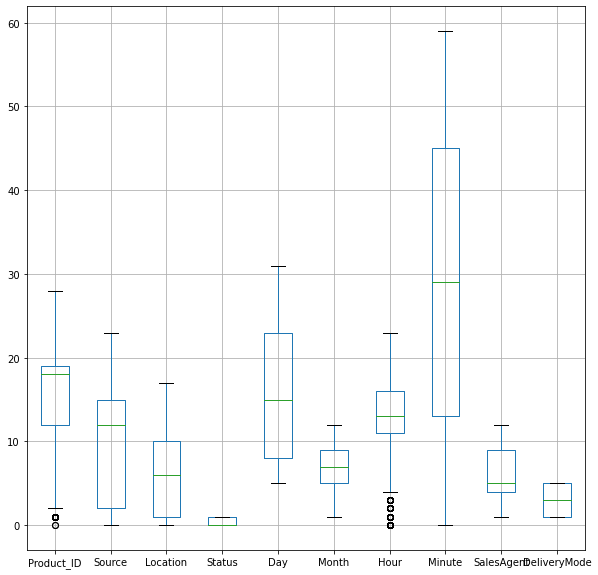

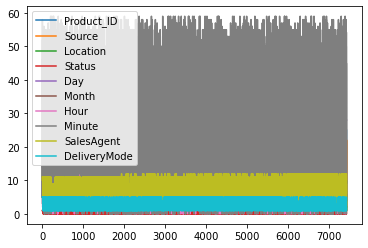

In [102]:
NewSalesData.boxplot(figsize=(10,10))
NewSalesData.plot()

### Analyze all the variables

<AxesSubplot:>

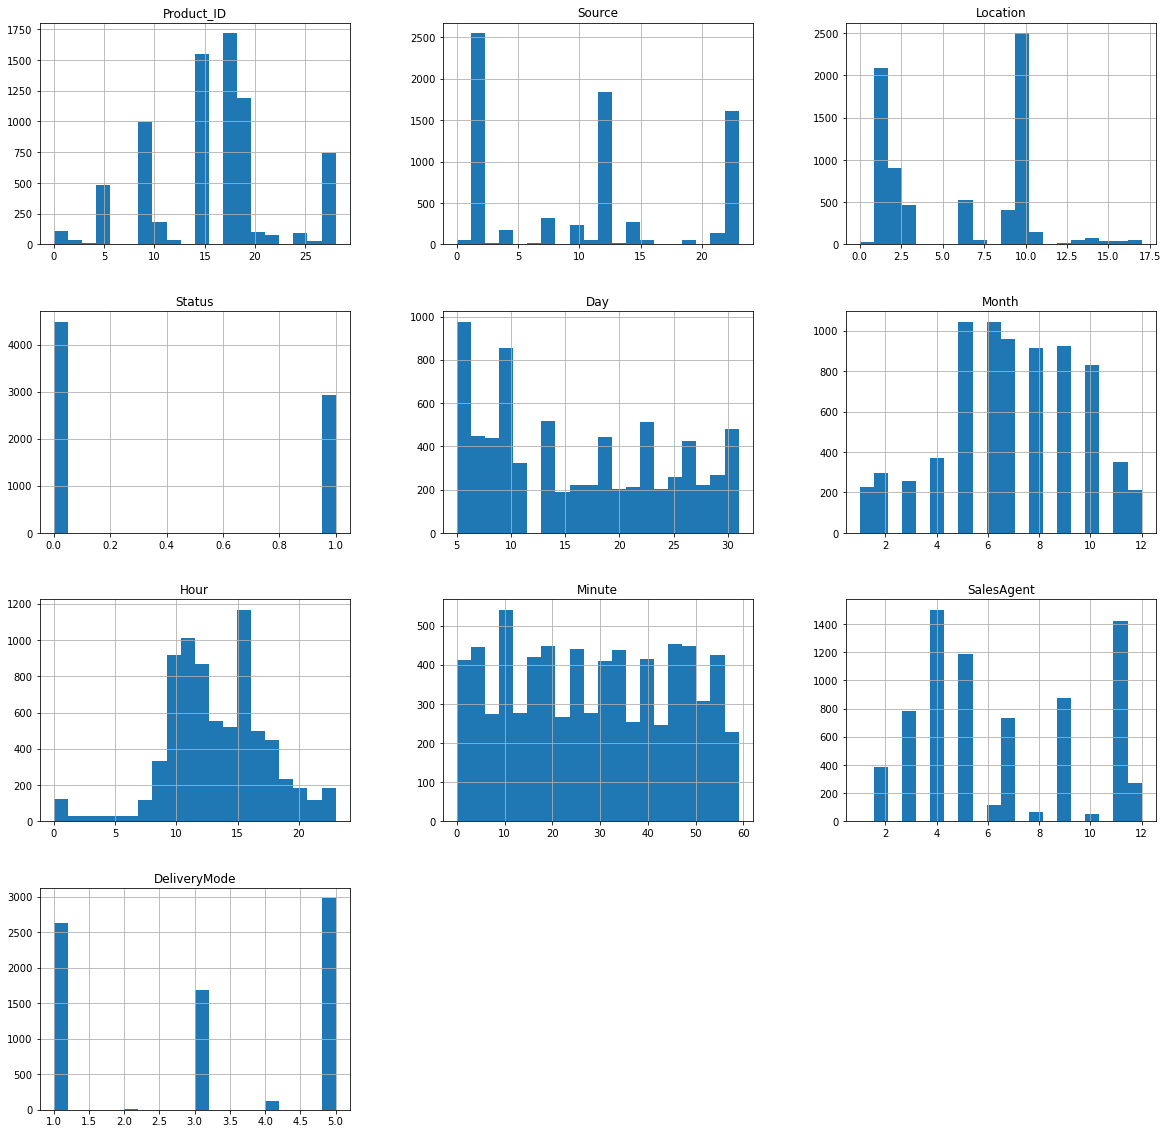

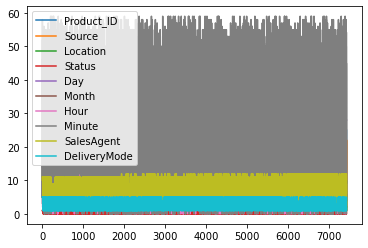

In [103]:
NewSalesData.hist(bins = 20,figsize=(20,20))
NewSalesData.plot()

### Analyze how each variable influence the target variable

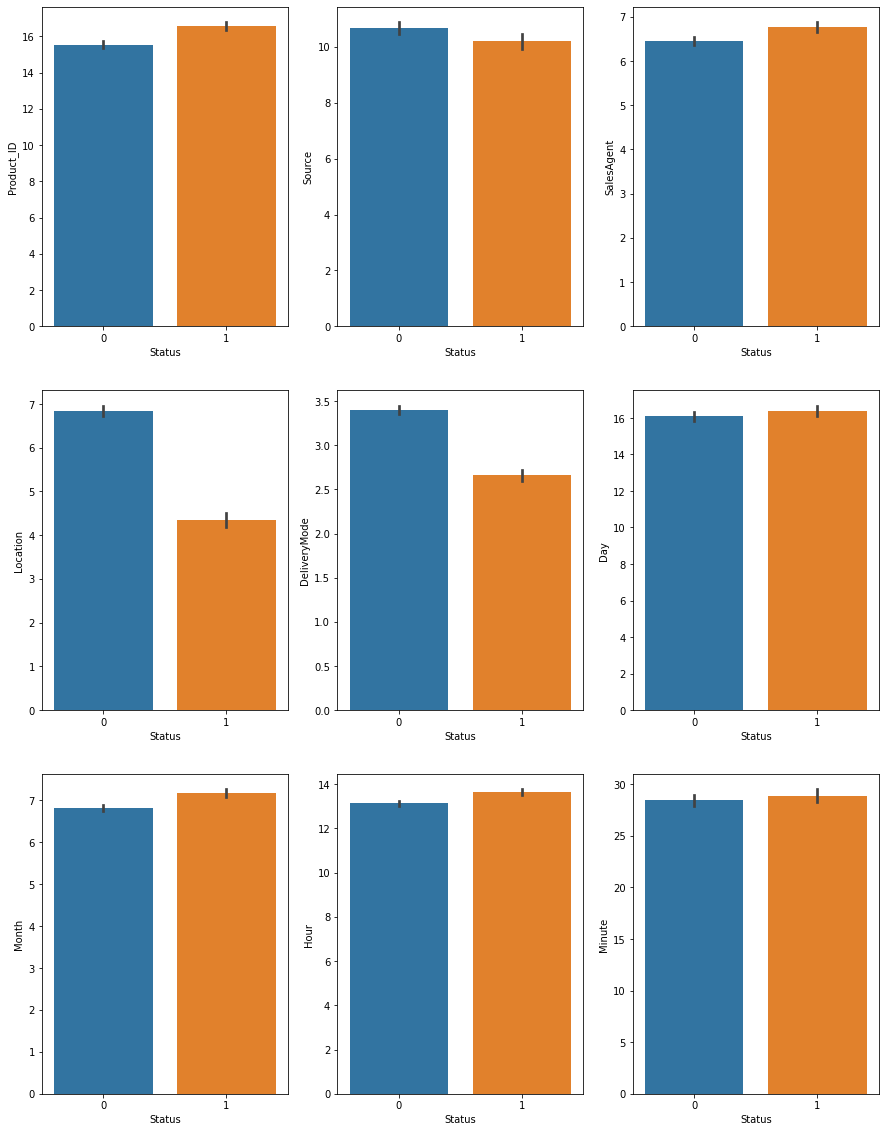

In [104]:
plt.figure(figsize=(15,20))

plt.subplot(3,3,1)
sns.barplot(x = NewSalesData['Status'], y = NewSalesData['Product_ID'])

plt.subplot(3,3,2)
sns.barplot(x = NewSalesData['Status'], y = NewSalesData['Source'])

plt.subplot(3,3,3)
sns.barplot(x = NewSalesData['Status'], y = NewSalesData['SalesAgent'])

plt.subplot(3,3,4)
sns.barplot(x = NewSalesData['Status'], y = NewSalesData['Location'])

plt.subplot(3,3,5)
sns.barplot(x = NewSalesData['Status'], y = NewSalesData['DeliveryMode'])

plt.subplot(3,3,6)
sns.barplot(x = NewSalesData['Status'], y = NewSalesData['Day'])

plt.subplot(3,3,7)
sns.barplot(x = NewSalesData['Status'], y = NewSalesData['Month'])

plt.subplot(3,3,8)
sns.barplot(x = NewSalesData['Status'], y = NewSalesData['Hour'])

plt.subplot(3,3,9)
sns.barplot(x = NewSalesData['Status'], y = NewSalesData['Minute'])

plt.show()

### To analyze how each variable influence the Target-variable(Status) feature wise

#### Product_ID

<AxesSubplot:xlabel='Product_ID', ylabel='count'>

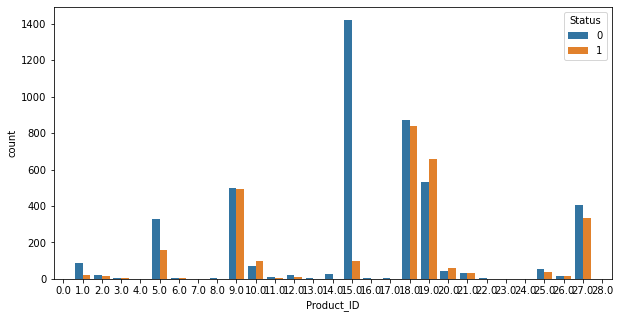

In [105]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Product_ID',hue = 'Status',data = NewSalesData)

#### Source

<AxesSubplot:xlabel='Source', ylabel='count'>

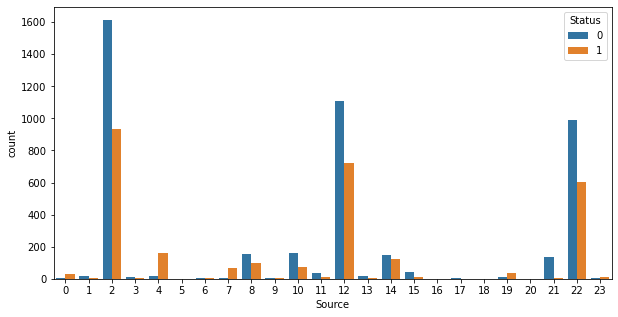

In [106]:
plt.figure(figsize=(10,5))
sns.countplot(x='Source',hue='Status',data=NewSalesData)

#### SalesAgent

<AxesSubplot:xlabel='SalesAgent', ylabel='count'>

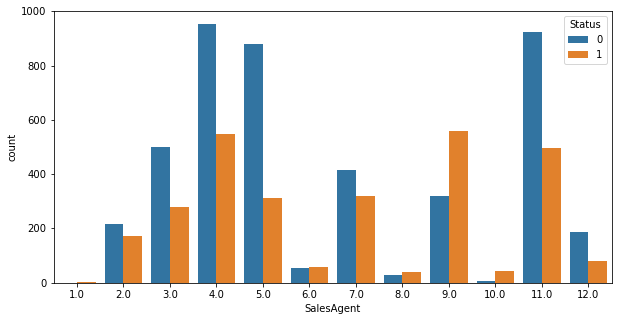

In [107]:
plt.figure(figsize=(10,5))
sns.countplot(x='SalesAgent',hue='Status',data=NewSalesData)

#### Location

<AxesSubplot:xlabel='Location', ylabel='count'>

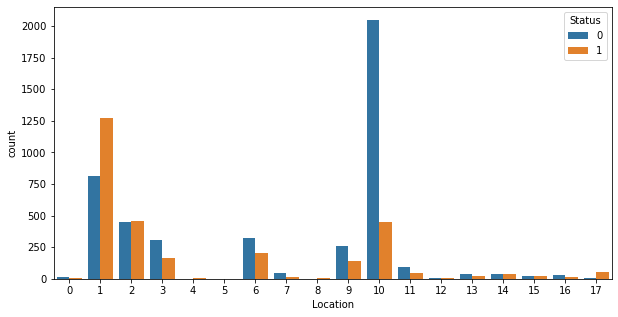

In [108]:
plt.figure(figsize=(10,5))
sns.countplot(x='Location',hue = 'Status',data = NewSalesData)

#### DeliveryMode

<AxesSubplot:xlabel='DeliveryMode', ylabel='count'>

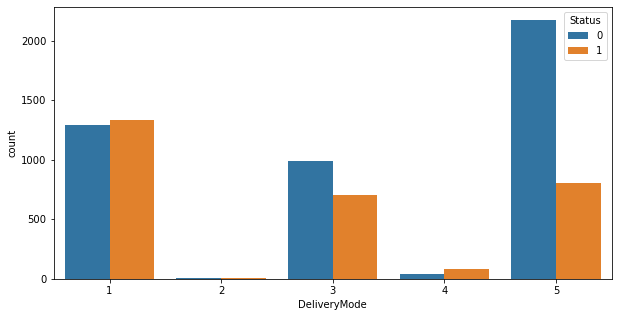

In [109]:
plt.figure(figsize=(10,5))
sns.countplot(x='DeliveryMode',hue='Status',data=NewSalesData)

#### Day

<AxesSubplot:xlabel='Day', ylabel='count'>

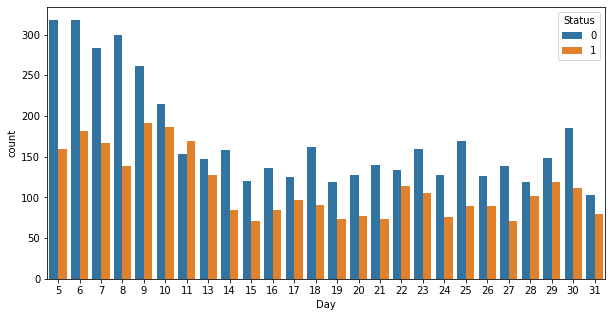

In [110]:
plt.figure(figsize=(10,5))
sns.countplot(x='Day',hue='Status',data=NewSalesData)

#### Month

<AxesSubplot:xlabel='Month', ylabel='count'>

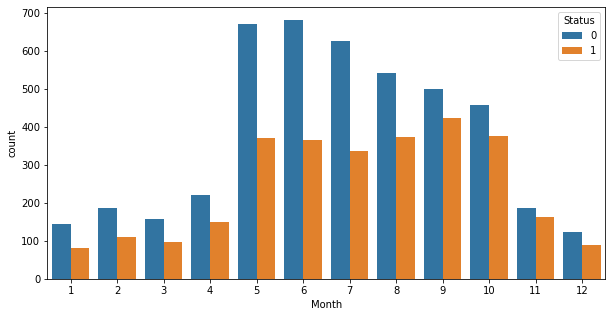

In [111]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month',hue='Status',data=NewSalesData)

#### Hour

<AxesSubplot:xlabel='Hour', ylabel='count'>

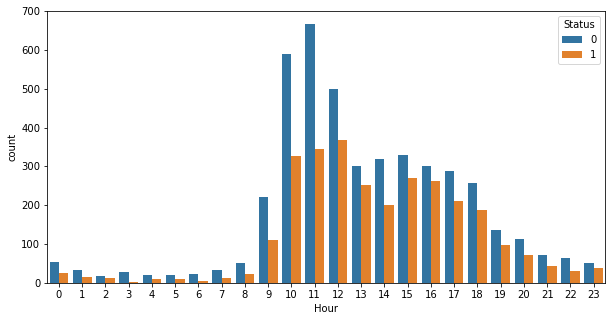

In [112]:
plt.figure(figsize=(10,5))
sns.countplot(x='Hour',hue='Status',data=NewSalesData)

#### Minute

<AxesSubplot:xlabel='Minute', ylabel='count'>

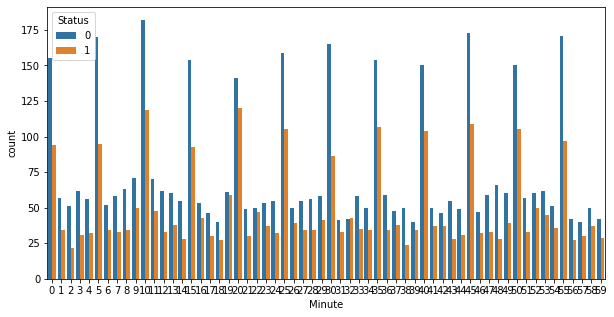

In [113]:
plt.figure(figsize=(10,5))
sns.countplot(x='Minute',hue='Status',data=NewSalesData)

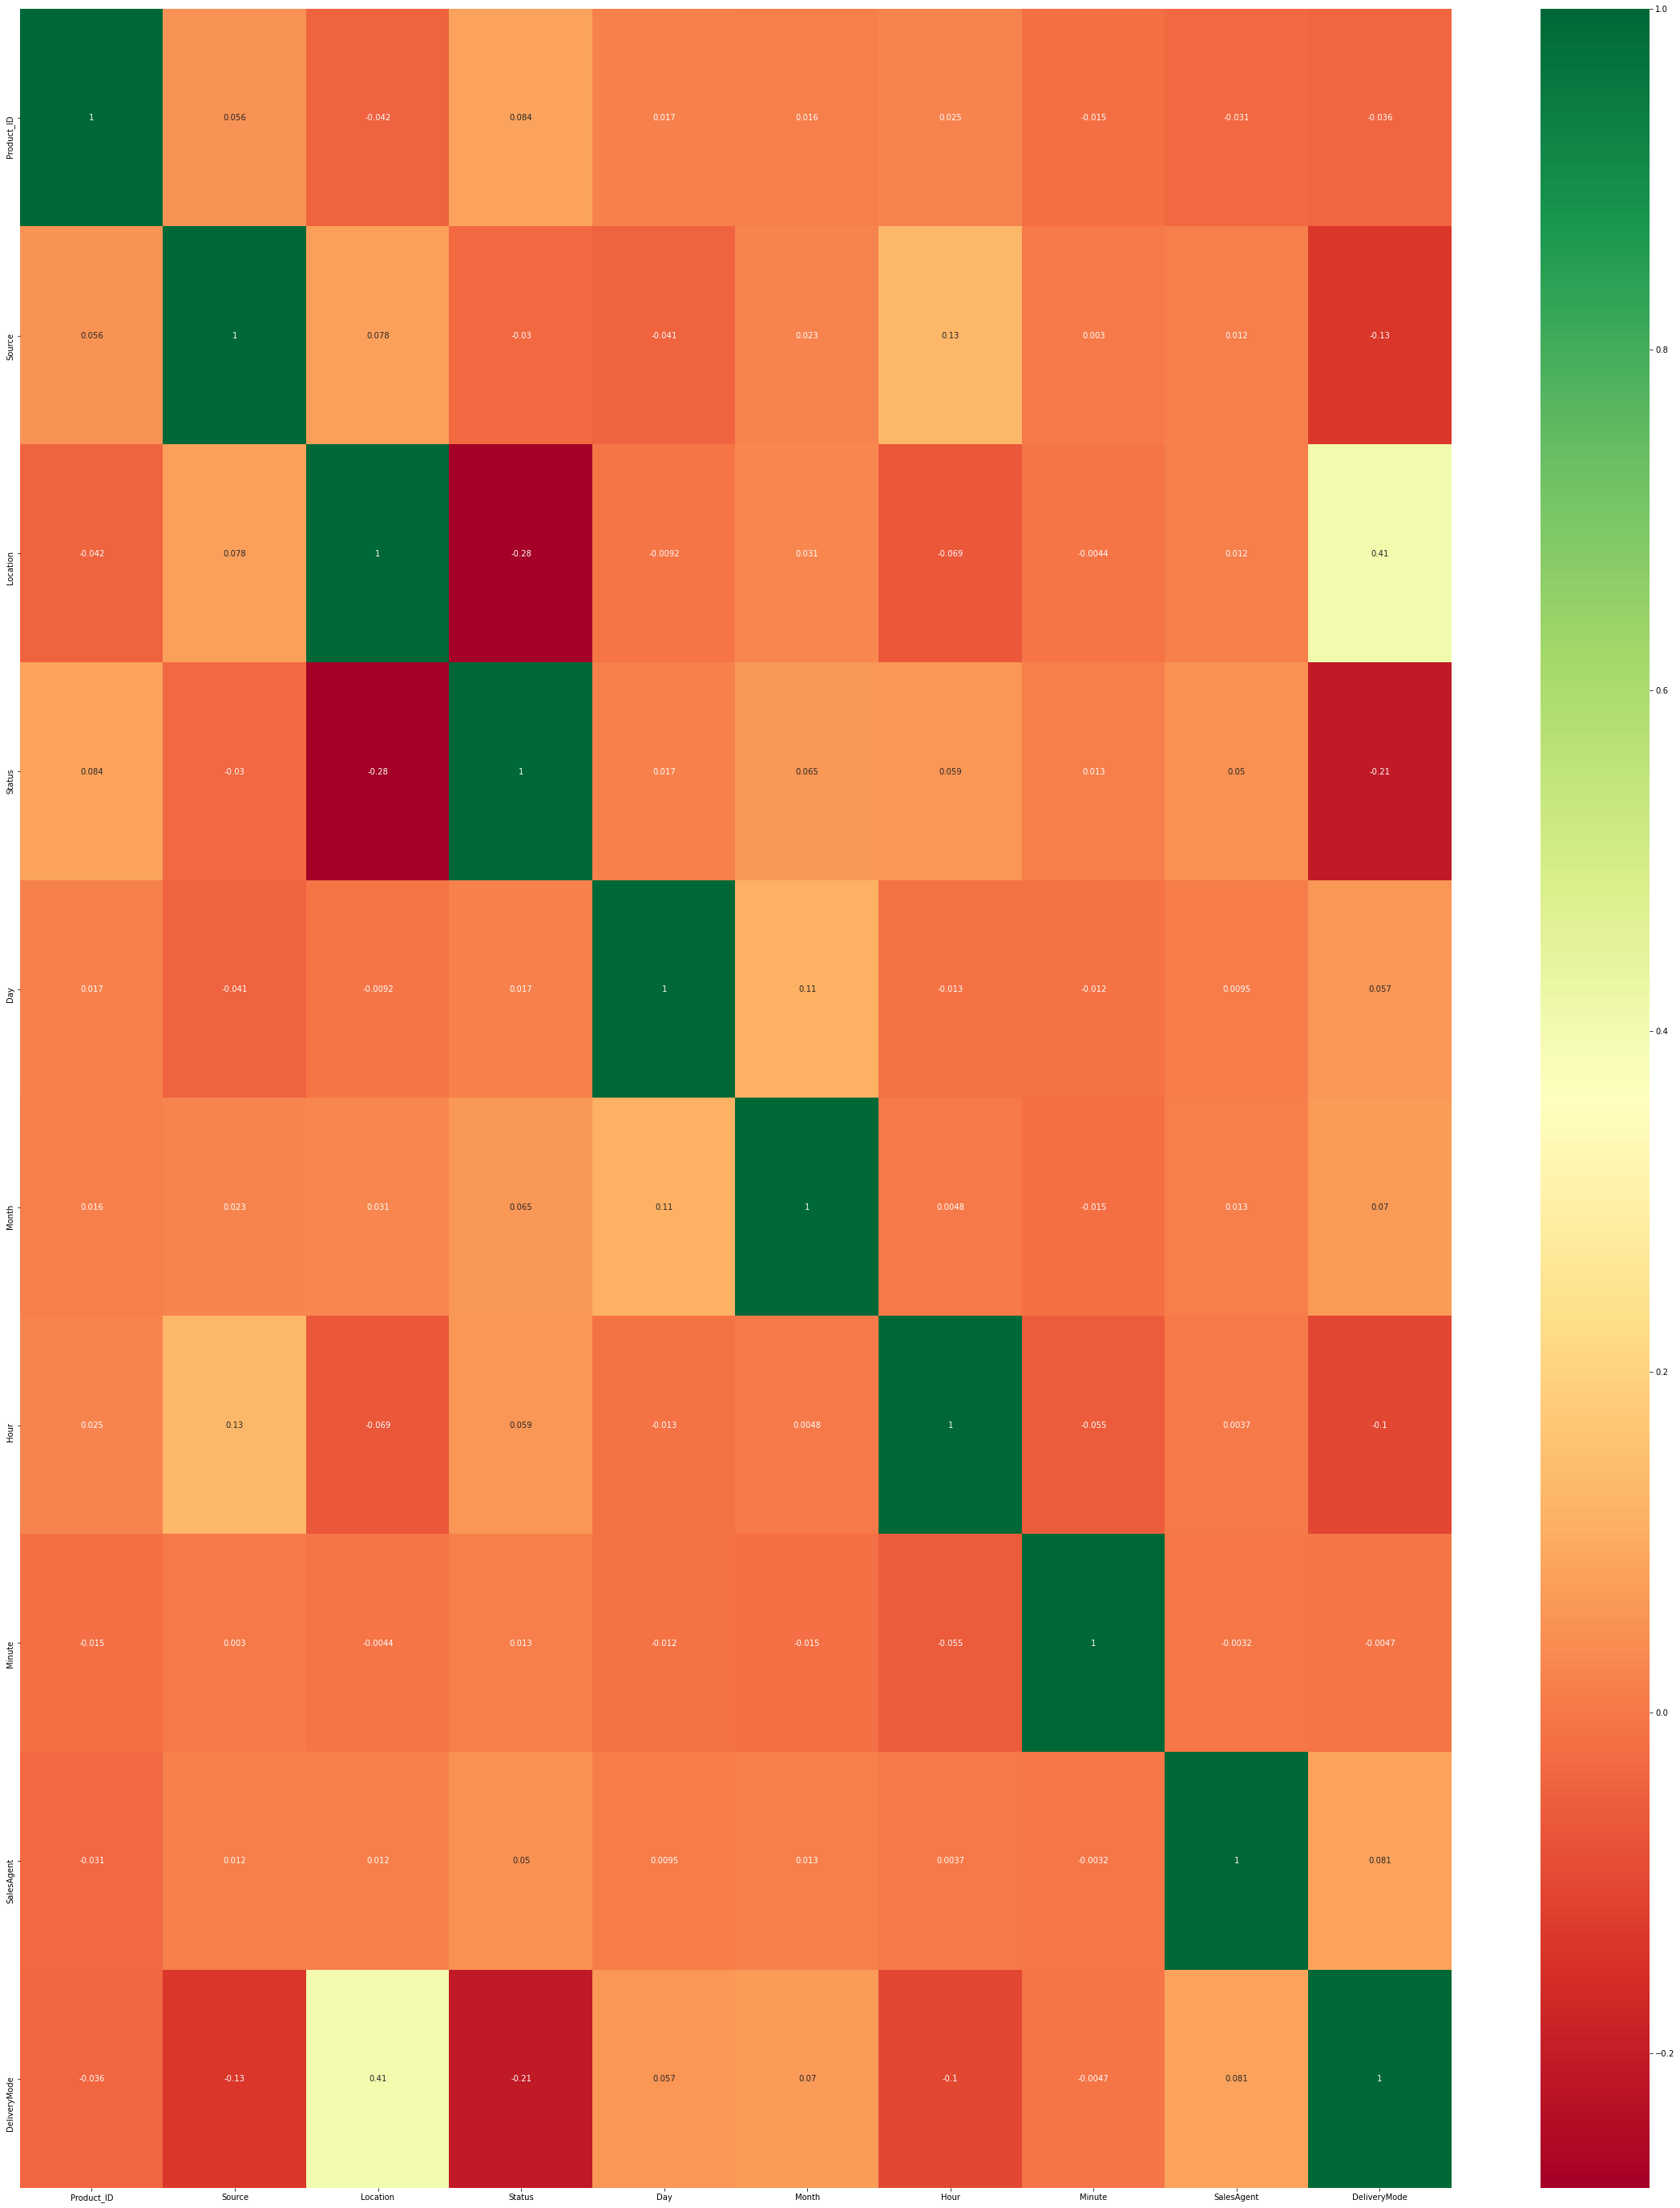

In [114]:
#plot heat map
corrmat = NewSalesData.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,50))
g = sns.heatmap(NewSalesData[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Modeling

In [115]:
NewSalesData.columns

Index(['Product_ID', 'Source', 'Location', 'Status', 'Day', 'Month', 'Hour',
       'Minute', 'SalesAgent', 'DeliveryMode'],
      dtype='object')

In [116]:
# Define X and y and encode x variables
X = NewSalesData.loc[:,['Day','Month','Hour','Minute','Product_ID','Source','Location','SalesAgent','DeliveryMode']]
X.head()

,Day,Month,Hour,Minute,Product_ID,Source,Location,SalesAgent,DeliveryMode
0,14,11,10,5,NaN,22,17,11.0,5
1,14,11,9,22,NaN,22,17,10.0,5
2,14,11,9,21,NaN,22,17,10.0,5
3,14,11,8,46,NaN,22,17,10.0,5
4,14,11,7,34,NaN,22,17,10.0,5


In [117]:
X = X.dropna(axis=1)
X.head()

,Day,Month,Hour,Minute,Source,Location,DeliveryMode
0,14,11,10,5,22,17,5
1,14,11,9,22,22,17,5
2,14,11,9,21,22,17,5
3,14,11,8,46,22,17,5
4,14,11,7,34,22,17,5


In [118]:
y = NewSalesData.loc[:,['Status']]
y.head()

,Status
0,1
1,1
2,1
3,1
4,1


In [119]:
NewSalesData.replace([np.inf, -np.inf], np.nan, inplace=True)
NewSalesData.fillna(999, inplace=True)

In [120]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 10, test_size = 0.3)

In [121]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_test_predict = model.predict(X_test)
print('Test accuracy:',accuracy_score(y_test,y_test_predict))

Test accuracy: 0.654243376740009


C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [122]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.68      0.80      0.73      1333
           1       0.59      0.44      0.50       894

    accuracy                           0.65      2227
   macro avg       0.64      0.62      0.62      2227
weighted avg       0.65      0.65      0.64      2227



In [123]:
confusion_matrix(y_test,y_test_predict)

array([[1066,  267],
       [ 503,  391]], dtype=int64)

In [124]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
parameters = {'max_depth':[80,90,100,110],
              'random_state': range(10,15,20),
              'n_estimators':[400,450,500,550,600], 
             }
grid = RandomizedSearchCV(rfmodel,parameters)
grid.fit(X_train,y_train)

C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A co

C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A co

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [80, 90, 100, 110],
                                        'n_estimators': [400, 450, 500, 550,
                                                         600],
                                        'random_state': range(10, 15, 20)})

In [125]:
grid.best_estimator_

RandomForestClassifier(max_depth=90, n_estimators=500, random_state=10)

In [126]:
grid.best_score_

0.6775745909528392

In [127]:
grid.best_params_

{'random_state': 10, 'n_estimators': 500, 'max_depth': 90}

In [128]:
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train,y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

C:\Users\Sanchitha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.654243376740009

In [129]:
rfmodel = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=110, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)
rfmodel.fit(X_train,y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
y_test_predict = model.predict(X_test)
print('Test accuracy:',accuracy_score(y_test,y_predict))

C:\Users\Sanchitha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Test accuracy: 0.654243376740009


In [130]:
y_train_predict = model.predict(X_train)
print('Train accuracy:',accuracy_score(y_train,y_train_predict))

Train accuracy: 0.6646775745909529


In [131]:
confusion_matrix(y_test,y_test_predict)

array([[1066,  267],
       [ 503,  391]], dtype=int64)

In [132]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.68      0.80      0.73      1333
           1       0.59      0.44      0.50       894

    accuracy                           0.65      2227
   macro avg       0.64      0.62      0.62      2227
weighted avg       0.65      0.65      0.64      2227



In [133]:
model = RandomForestClassifier(n_estimators=10,random_state=42)
parameter = [{'criterion':['gini'],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3,4]}]
grid_search_rf = GridSearchCV(estimator=model,param_grid=parameter,scoring='accuracy',cv=10)
grid_search_rf.fit(X_train,y_train)

C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A co

C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A co

C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A co

C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sanchitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A co

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=10, random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_leaf': [1, 2, 3, 4],
                          'min_samples_split': [2, 3, 4]}],
             scoring='accuracy')

In [134]:
grid_search_rf.best_estimator_

RandomForestClassifier(min_samples_leaf=2, n_estimators=10, random_state=42)

In [135]:
grid_search_rf.best_score_

0.6770082999851785